In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import scipy
import math
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


In [3]:
data = pd.read_csv('data/legend.csv')
data.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [4]:
data['emotion'] = data['emotion'].str.lower()
print(data['emotion'].str.lower().unique())
type_y = data['emotion'].str.lower().unique()
type(type_y)

['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt']


numpy.ndarray

In [5]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []

for i in range(0,13650):
    A = cv2.imread('images/'+data.iloc[i,1])
    B = cv2.resize(A,dsize=(64, 64),interpolation=cv2.INTER_CUBIC)
    C = B
    out = data.iloc[i,2]
    idx = np.where(type_y==out.lower())[0][0]
    #print(idx)
    if idx==0:
        y0.append(out)
        list0.append(C)
    elif idx==1:
        y1.append(out)
        list1.append(C)
    elif idx==2:
        y2.append(out)
        list2.append(C)
    elif idx==3:
        y3.append(out)
        list3.append(C)
    elif idx==4:
        y4.append(out)
        list4.append(C)
    elif idx==5:
        y5.append(out)
        list5.append(C)
    elif idx==6:
        y6.append(out)
        list6.append(C)
    elif idx==7:
        y7.append(out)
        list7.append(C)

In [6]:
list0 = np.array(list0)
list1 = np.array(list1)
list2 = np.array(list2)
list3 = np.array(list3)
list4 = np.array(list4)
list5 = np.array(list5)
list6 = np.array(list6)
list7 = np.array(list7)
y0 = np.array(y0)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)
y6 = np.array(y6)
y7 = np.array(y7)
print(list0.shape,"  ",y0.shape)
print(list1.shape,"  ",y1.shape)
print(list2.shape,"  ",y2.shape)
print(list3.shape,"  ",y3.shape)
print(list4.shape,"  ",y4.shape)
print(list5.shape,"  ",y5.shape)
print(list6.shape,"  ",y6.shape)
print(list7.shape,"  ",y7.shape)

(249, 64, 64, 3)    (249,)
(368, 64, 64, 3)    (368,)
(208, 64, 64, 3)    (208,)
(21, 64, 64, 3)    (21,)
(6868, 64, 64, 3)    (6868,)
(5659, 64, 64, 3)    (5659,)
(268, 64, 64, 3)    (268,)
(9, 64, 64, 3)    (9,)


In [7]:
list_main = []
y = []
a0=0
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
for i in range(0,1900):
    if(list0.shape[0]>a0):
        list_main.append(list0[a0])
        y.append(y0[a0])
        a0+=1
    if(list1.shape[0]>a1):
        list_main.append(list1[a1])
        y.append(y1[a1])
        a1+=1
    if(list2.shape[0]>a2):
        list_main.append(list2[a2])
        y.append(y2[a2])
        a2+=1
    if(list4.shape[0]>a4 and a4<401):
        list_main.append(list4[a4])
        y.append(y4[a4])
        a4+=1
    if(list5.shape[0]>a5 and a5<401):
        list_main.append(list5[a5])
        y.append(y5[a5])
        a5+=1
    if(list6.shape[0]>a6):
        list_main.append(list6[a6])
        y.append(y6[a6])
        a6+=1
print(a0,a1,a2,a3,a4,a5,a6)
list_main = np.array(list_main)
y = np.array(y)
print(list_main.shape)
print(y.shape)

249 368 208 0 401 401 268
(1895, 64, 64, 3)
(1895,)


In [8]:
type_y = ['anger','surprise','disgust','neutral','happiness','sadness']
a0 = [1,0,0,0,0,0]
a1 = [0,1,0,0,0,0]
a2 = [0,0,1,0,0,0]
a3 = [0,0,0,1,0,0]
a4 = [0,0,0,0,1,0]
a5 = [0,0,0,0,0,1]
new_y = []
for i in y:
    if i=='anger':
        new_y.append(a0)
    elif i=='surprise':
        new_y.append(a1)
    elif i=='disgust':
        new_y.append(a2)
    elif i=='neutral':
        new_y.append(a3)
    elif i=='happiness':
        new_y.append(a4)
    elif i=='sadness':
        new_y.append(a5)
new_y = np.array(new_y)
print(new_y.shape)

(1895, 6)


In [9]:
X_orig = list_main
Y_orig = new_y
print("Shape of X : ",X_orig.shape)
print("Shape of Y : ",Y_orig.shape)

Shape of X :  (1895, 64, 64, 3)
Shape of Y :  (1895, 6)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_orig,Y_orig,test_size=0.1,random_state=1)

In [11]:
X_train = X_train/255
X_test = X_test/255
print("Training X shape : ",X_train.shape)
print("Training Y shape : ",y_train.shape)
print("Testing X shape : ",X_test.shape)
print("Testing Y shape : ",y_test.shape)

Training X shape :  (1705, 64, 64, 3)
Training Y shape :  (1705, 6)
Testing X shape :  (190, 64, 64, 3)
Testing Y shape :  (190, 6)


In [12]:
def identity_block(X, f, filters, stage, block):
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [13]:
def convolutional_block(X, f, filters, stage, block, s=2):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [14]:
def ResNet50(input_shape=(64, 64, 3), classes=6):
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [15]:
model = ResNet50(input_shape=(64, 64, 3), classes=6)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [17]:
print("Number of training example : ",X_train.shape[0])
print("Number of testing example : ",X_test.shape[0])

Number of training example :  1705
Number of testing example :  190


In [18]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1705/1705 [==============================] - 1120s - loss: 2.8675 - acc: 0.1971  
Epoch 2/30
1705/1705 [==============================] - 1106s - loss: 2.4014 - acc: 0.2082  
Epoch 3/30
1705/1705 [==============================] - 1109s - loss: 2.3060 - acc: 0.2264  
Epoch 4/30
1705/1705 [==============================] - 1105s - loss: 2.2583 - acc: 0.2487  
Epoch 5/30
1705/1705 [==============================] - 1107s - loss: 2.1363 - acc: 0.2897  
Epoch 6/30
1705/1705 [==============================] - 1103s - loss: 2.1663 - acc: 0.3003  
Epoch 7/30
1705/1705 [==============================] - 1110s - loss: 2.2603 - acc: 0.2739  
Epoch 8/30
1705/1705 [==============================] - 1107s - loss: 2.2396 - acc: 0.2944  
Epoch 9/30
1705/1705 [==============================] - 1105s - loss: 1.9735 - acc: 0.3279  
Epoch 10/30
1705/1705 [==============================] - 1110s - loss: 1.9223 - acc: 0.3314  
Epoch 11/30
1705/1705 [==============================] - 1110s - loss

In [19]:
preds = model.evaluate(X_test, y_test)
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

190/190 [==============================] - 6s     
Loss = 2.19723738369
Test Accuracy = 0.278947370617


In [ ]:
new_model = load_model('ResNet50.h5')

In [27]:
#new_model.fit(X_train,y_train,epochs=15,batch_size=64)

Epoch 1/15
1705/1705 [==============================] - 1140s - loss: 2.6132 - acc: 0.2674   
Epoch 2/15
1705/1705 [==============================] - 1157s - loss: 1.7343 - acc: 0.3519   
Epoch 3/15
1705/1705 [==============================] - 1153s - loss: 1.5260 - acc: 0.4528   
Epoch 4/15
1705/1705 [==============================] - 1137s - loss: 1.4217 - acc: 0.4944   
Epoch 5/15
1705/1705 [==============================] - 1145s - loss: 1.2786 - acc: 0.5531   
Epoch 6/15
1705/1705 [==============================] - 1134s - loss: 1.3161 - acc: 0.5947   
Epoch 7/15
1705/1705 [==============================] - 1190s - loss: 2.0811 - acc: 0.2897   
Epoch 8/15
1705/1705 [==============================] - 1166s - loss: 2.1170 - acc: 0.2487   
Epoch 9/15
 768/1705 [============>.................] - ETA: 677s - loss: 2.0845 - acc: 0.2617

KeyboardInterrupt: 

In [28]:
preds = new_model.evaluate(X_test, y_test)
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

KeyboardInterrupt: 

Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
[[ 0.00358072  0.02995986  0.8548035   0.02231161  0.05079603  0.03854822]]


C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


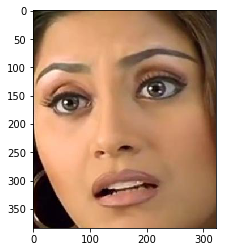

In [25]:
img_path = 'test/RimiSen_132.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = scipy.misc.imread(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(model.predict(x))